In [52]:

#here we have multiple csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path='E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\'

In [53]:
company_list=["AAPL_data.csv","GOOG_data.csv","MSFT_data.csv",
             "AMZN_data.csv"]
#saving names of file in list so can concate them using for loop

In [54]:

all_data=pd.DataFrame()
for file in company_list:
    current=pd.read_csv(path+file)
    all_data=pd.concat([all_data,current])
all_data.shape

(4752, 7)

In [55]:
all_data.head()
#convert date to date data type
all_data["date"]=pd.to_datetime(all_data["date"])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.0+ KB


In [56]:
#analysing closing price of all the stocks
company_list=all_data["Name"].unique()
#this are our stocks name

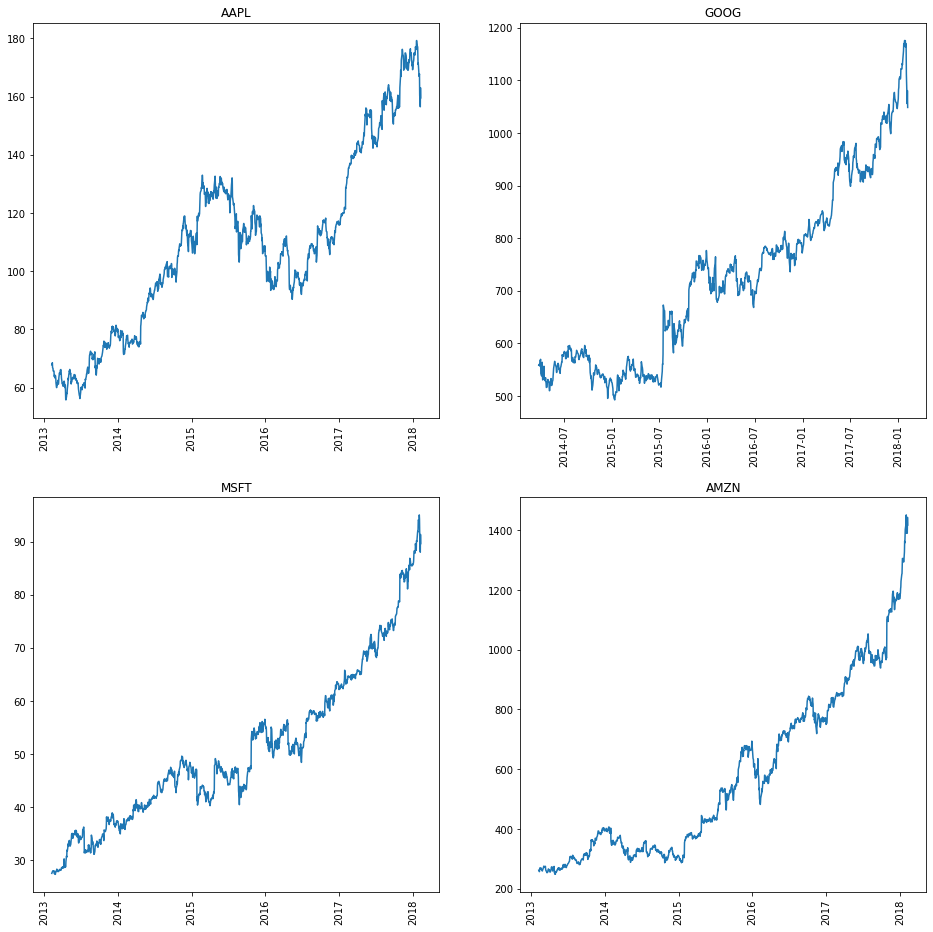

In [57]:
plt.figure(figsize=(16,16))
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i) #here i is index which select the subplot
    df=all_data[all_data["Name"]==company] #here we first select all data of one company in one data frame and plot graph
    plt.plot(df["date"],df["close"]) #data of example apple is stored in df and its date and close rate
    plt.title(company)
    plt.xticks(rotation=90)

In [58]:
#analys total volume of the stock traded each date

In [59]:
!pip install plotly

In [60]:
import plotly.express as px

In [61]:
for company in company_list:
    df=all_data[all_data["Name"]==company]
    fig=px.line(df,x="date",y="volume",title=company)
    fig.show()
    #it helps to deeply analyse
    #and u can download plotly and all
    

In [51]:
#analyse daily price change in stock
#analyse monthly mean of close feature

In [64]:
data=pd.read_csv("E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv")

In [66]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [67]:
# here we have to create column of daily price change
data["daily_price_change"]=data["close"]-data["open"]

In [68]:
data

,date,open,high,low,close,volume,Name,daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.6150
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-5.5000
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.6100
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,8.2000


In [69]:
data["one_day_percentage return"]=((data["close"]-data["open"])/data["close"])*100

In [70]:
data.head()

,date,open,high,low,close,volume,Name,daily_price_change,one_day_percentage return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [72]:
px.line(data,x="date",y=["one_day_percentage return"])

In [73]:
#analyse monthly mean of close feautre

In [74]:
data2=data.copy()

In [75]:
data2.head()

,date,open,high,low,close,volume,Name,daily_price_change,one_day_percentage return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [79]:
data2.dtypes

date                          object
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
daily_price_change           float64
one_day_percentage return    float64
dtype: object

In [81]:
data2["date"]=pd.to_datetime(data2["date"])

In [82]:
data2.dtypes

date                         datetime64[ns]
open                                float64
high                                float64
low                                 float64
close                               float64
volume                                int64
Name                                 object
daily_price_change                  float64
one_day_percentage return           float64
dtype: object

In [83]:
data2.set_index("date",inplace=True)

In [84]:
data2.head()

,open,high,low,close,volume,Name,daily_price_change,one_day_percentage return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [85]:
data2["close"].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

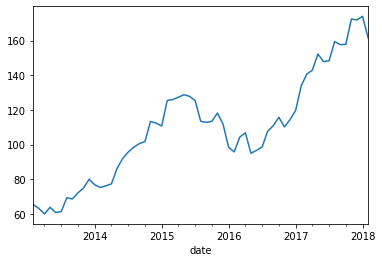

In [92]:
data2["close"].resample('M').mean().plot()

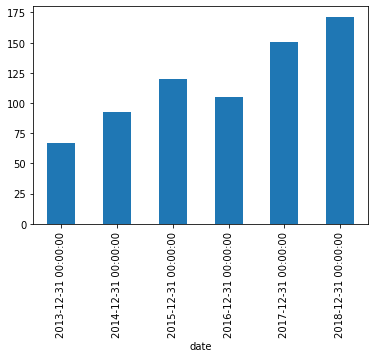

In [93]:
data2["close"].resample("Y").mean().plot(kind="bar")

In [94]:
# check whether stock prices of companies are realted or not
#analys daily return of each stock and how they are corelated
#value at risk analys for tech company

In [100]:
aapl=pd.read_csv("E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv")
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [101]:
amzn=pd.read_csv("E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\AMZN_data.csv")
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [103]:
micro=pd.read_csv("E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\MSFT_data.csv")
micro.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [105]:
goog=pd.read_csv("E:\\datascience\\python\\data analysis project\\Untitled Folder\\2-Time Series Data Analysis\\individual_stocks_5yr\\GOOG_data.csv")
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [106]:
close=pd.DataFrame()


In [107]:
close["aaple"]=aapl["close"]
close["amzn"]=amzn["close"]
close["goog"]=goog["close"]
close["msft"]=micro["close"]

In [108]:
close.head()

,aaple,amzn,goog,msft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


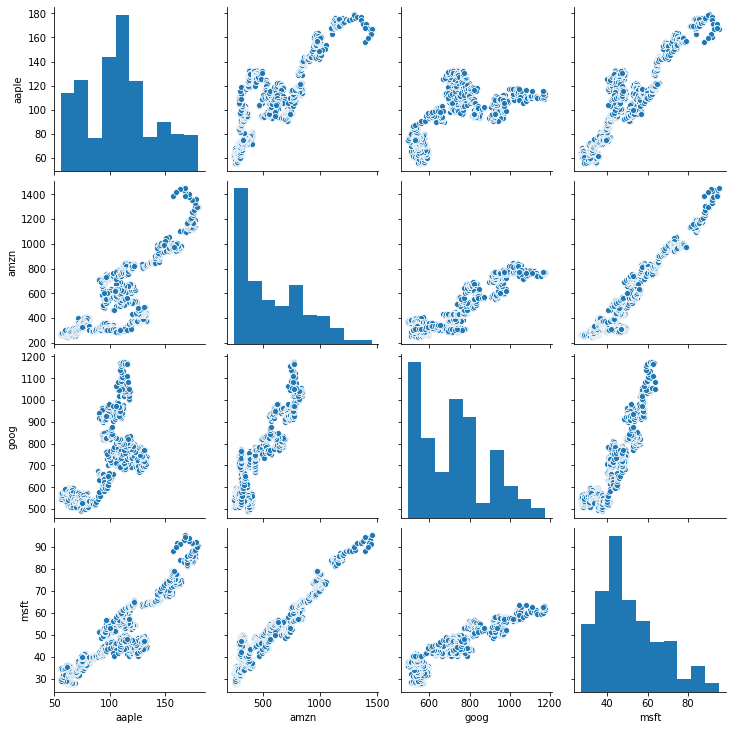

In [109]:
sns.pairplot(close)

In [110]:
close.corr()

,aaple,amzn,goog,msft
aaple,1.000000,0.819078,0.640522,0.899689
amzn,0.819078,1.000000,0.888456,0.955977
goog,0.640522,0.888456,1.000000,0.907011
msft,0.899689,0.955977,0.907011,1.000000


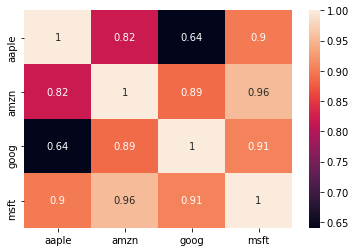

In [111]:
# here we can see amazon is really good corelated to microsoft 
# and google also good corelated to microsoft
sns.heatmap(close.corr(),annot=True)

In [112]:
#analys daily return of each company and how they are correlated



In [113]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [114]:
data=pd.DataFrame()
data["aapl_change"]=((aapl["close"]-aapl["open"])/aapl["close"])*100
data["google_change"]=((goog["close"]-goog["open"])/goog["close"])*100
data["micro_change"]=((micro["close"]-micro["open"])/micro["close"])*100
data["amazon_change"]=((amzn["close"]-amzn["open"])/amzn["close"])*100

In [116]:
data.head()

,aapl_change,google_change,micro_change,amazon_change
0,0.206325,-1.708269,0.725953,0.209964
1,0.714688,-0.216075,0.753769,-2.328836
2,-2.481344,-1.781065,0.000000,-0.189409
3,-0.042869,1.489879,0.356761,2.946525
4,0.443624,0.334039,0.427960,0.694548


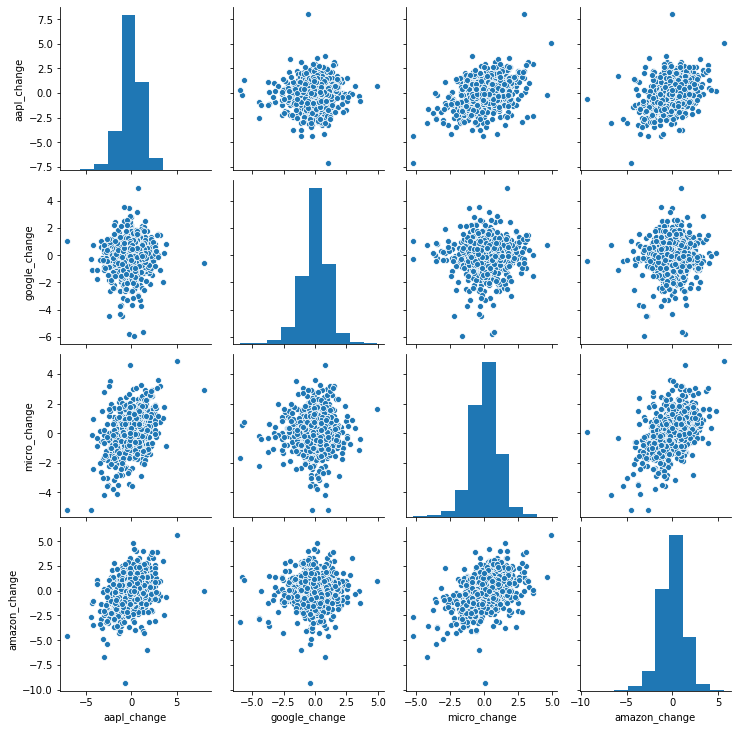

In [117]:
sns.pairplot(data)

In [118]:
data.corr()

,aapl_change,google_change,micro_change,amazon_change
aapl_change,1.000000,0.047682,0.403805,0.369464
google_change,0.047682,1.000000,0.016913,0.066030
micro_change,0.403805,0.016913,1.000000,0.419033
amazon_change,0.369464,0.066030,0.419033,1.000000


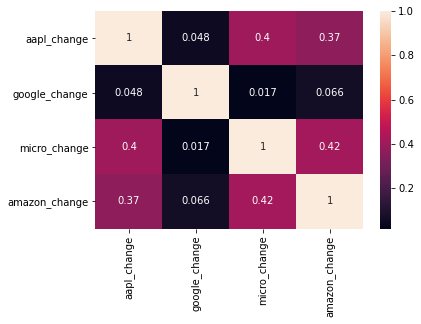

In [121]:
sns.heatmap(data.corr(),annot=True)

In [122]:
#amazon and micro have 42 percent correlation
#apple and google has 0.048 correlation


In [123]:
# value at risk for different comopany

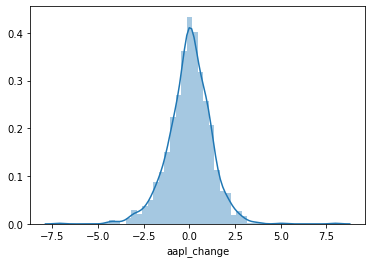

In [124]:
sns.distplot(data["aapl_change"])

In [125]:
data["aapl_change"].std()
##68 percent of entire data

1.1871377131421237

In [126]:
data["aapl_change"].std()*2
#-2.37 to +2.37 95% data

2.3742754262842474

In [128]:
data["aapl_change"].std()*3
#99.7% entire data is between -3.5 to +3.5

3.561413139426371

In [130]:
data["aapl_change"].quantile(0.1)

-1.4246644227944307

In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
google_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
micro_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
amazon_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
